# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

1.   I think it would be around 11% for both, because the numbers 1-9 follow a uniform distribution. The first digit seems like it should follow that as well, although certain data would probably be different depending on the context. For instance, if something were unlikely to have data points go past 200, there would likely be a lot of numbers starting with 1 since there are so many more possible values that start with 1.
2.   I would think it would be around 10% because the number 0 is possible for the last digit now. Also, the last number seems more random than the first, so I would expect it to be nearly uniform.

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import pandas as pd 

df_stocks = pd.read_csv('https://dlsun.github.io/pods/data/sp500.csv')
df_stocks
df_stocks.set_index('Name')

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


The unit of observation is a company on the stock market. The variable 'Name' would make sense to use as the natural index.



## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

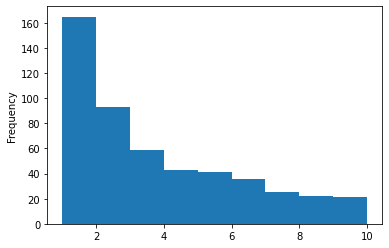

In [ ]:
df_stocks['vol'] = df_stocks['volume'].astype(str)
df_stocks_vols = df_stocks['vol'].str[0].astype(int)
df_stocks_vols.astype(int).plot.hist(bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

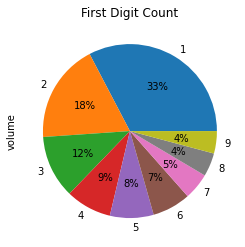

In [ ]:
# Create a series with volume as type string
volume = pd.Series(df_stocks['volume'], dtype="string")

# Extract the first digit of each value in volume
volume = volume.str.get(0).astype(int)

# Plot the distribution of the digits
volume.value_counts(normalize=True).plot(kind='pie', y='Count', autopct='%1.0f%%', title='First Digit Count')

This is not exactly what we predicted, this is an exponential distribution rather than a uniform distribution. It is likely that the data has something to do with this.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

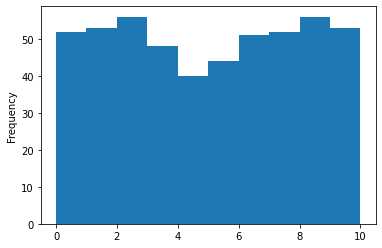

In [ ]:
df_stocks['vol'] = df_stocks['volume'].astype(str)
df_stocks_vols = df_stocks['vol'].str[-1].astype(int)
df_stocks_vols.astype(int).plot.hist(bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

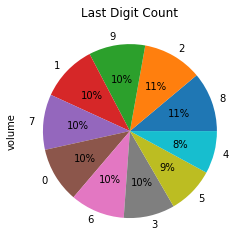

In [ ]:
# Create a series with volume as type string
volume = pd.Series(df_stocks['volume'], dtype="string")

# Extract the first digit of each value in volume
volume = volume.str.get(-1).astype(int)

# Plot the distribution of the digits
volume.value_counts(normalize=True).plot(kind='pie', y='Count', autopct='%1.0f%%', title='Last Digit Count')

This is closer to what we expected, a distribution nearly uniform. The variation around digits 4 and 5 may be due to the data, or maybe it is a bimodal distribution.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

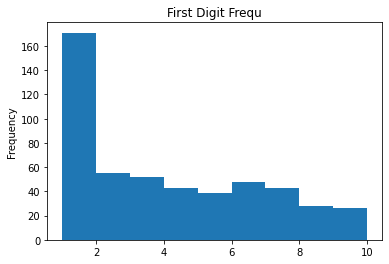

In [ ]:
# Strip junk characters from string
df_stocks['close'] = df_stocks['close'].str.replace('$', '').str.replace(',', '')

# Turn 'close' column to type int
df_stocks['close'] = df_stocks['close'].astype(float)

# Create a series with close as type string
close = pd.Series(df_stocks['close'], dtype="string")

# Extract the first digit of each value in close
close = close.str.get(0).astype(int)

close.plot.hist(bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], title='First Digit Frequ')

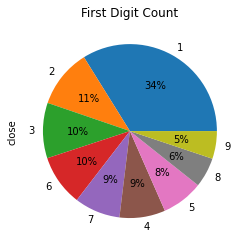

In [ ]:
# Plot the distribution of the digits
close.value_counts(normalize=True).plot(kind='pie', y='Count', autopct='%1.0f%%', title='First Digit Count')

The first integer of the closing price of the stock is skewed heavily towards 1 as well, indicating we were wrong. The first digit is much more common than any other number.